In [2]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

try:
    df = pd.read_csv("mark.csv")
    print("Data loaded")
except FileNotFoundError:
    print("Hey! The file was not found. Check again!")
    
# try:
#     df = pd.read_csv("testset.csv", index_col=0)
#     print("Data loaded")
# except FileNotFoundError:
#     print("Hey! The file was not found. Check again!")

#### Print the data 
df.head(10)

Data loaded


,Time,x,y,z,Speedbreaker,Pothole
0,34.734,-1.50,2.15,9.11,0,0
1,34.793,-1.31,2.15,9.11,0,0
2,34.871,-1.33,2.11,8.85,0,0
3,34.931,-1.23,2.11,9.00,0,0
4,34.991,-1.33,2.11,8.92,0,0
5,35.068,-1.38,2.11,8.96,0,0
6,35.131,-1.33,2.11,8.96,0,0
7,35.209,-1.33,2.11,9.04,0,0
8,35.273,-1.38,2.15,8.92,0,0
9,35.338,-1.33,2.15,8.92,0,0


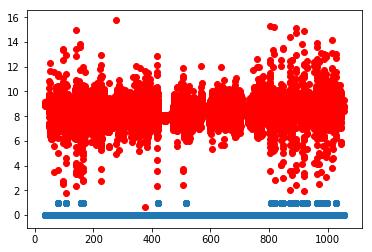

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(df['Time'], df['z'], color='red')
plt.scatter(df['Time'], df['Speedbreaker'])

plt.show()

In [47]:
df1 = df[df['Speedbreaker'] == 1]

In [48]:
df1

,Time,x,y,z,Speedbreaker,Pothole
648,78.523,-1.14,4.67,3.68,1,0
649,78.583,-1.46,4.21,4.99,1,0
650,78.647,0.99,4.60,7.55,1,0
651,78.716,2.75,3.41,7.63,1,0
652,78.781,4.44,3.83,8.85,1,0
653,78.851,4.33,2.56,9.81,1,0
654,78.921,1.69,3.30,9.23,1,0
655,78.987,1.12,3.99,8.69,1,0
1076,107.205,-1.65,4.18,9.34,1,0
1077,107.283,-0.61,4.18,10.50,1,0


In [49]:
len(df1)

165

In [52]:
df2 = df[df['Speedbreaker'] != 1]

In [53]:
df2

,Time,x,y,z,Speedbreaker,Pothole
0,34.734,-1.50,2.15,9.11,0,0
1,34.793,-1.31,2.15,9.11,0,0
2,34.871,-1.33,2.11,8.85,0,0
3,34.931,-1.23,2.11,9.00,0,0
4,34.991,-1.33,2.11,8.92,0,0
5,35.068,-1.38,2.11,8.96,0,0
6,35.131,-1.33,2.11,8.96,0,0
7,35.209,-1.33,2.11,9.04,0,0
8,35.273,-1.38,2.15,8.92,0,0
9,35.338,-1.33,2.15,8.92,0,0


In [54]:
len(df2)

15027

In [56]:
df3 = df2[:len(df1)]

In [57]:
df3

,Time,x,y,z,Speedbreaker,Pothole
0,34.734,-1.50,2.15,9.11,0,0
1,34.793,-1.31,2.15,9.11,0,0
2,34.871,-1.33,2.11,8.85,0,0
3,34.931,-1.23,2.11,9.00,0,0
4,34.991,-1.33,2.11,8.92,0,0
5,35.068,-1.38,2.11,8.96,0,0
6,35.131,-1.33,2.11,8.96,0,0
7,35.209,-1.33,2.11,9.04,0,0
8,35.273,-1.38,2.15,8.92,0,0
9,35.338,-1.33,2.15,8.92,0,0


In [60]:
df4 = pd.concat([df1, df3])

In [61]:
df4

,Time,x,y,z,Speedbreaker,Pothole
648,78.523,-1.14,4.67,3.68,1,0
649,78.583,-1.46,4.21,4.99,1,0
650,78.647,0.99,4.60,7.55,1,0
651,78.716,2.75,3.41,7.63,1,0
652,78.781,4.44,3.83,8.85,1,0
653,78.851,4.33,2.56,9.81,1,0
654,78.921,1.69,3.30,9.23,1,0
655,78.987,1.12,3.99,8.69,1,0
1076,107.205,-1.65,4.18,9.34,1,0
1077,107.283,-0.61,4.18,10.50,1,0


In [63]:
df5 = df4.drop(['Pothole'],axis = 1)

In [65]:
df5.head()

,Time,x,y,z,Speedbreaker
648,78.523,-1.14,4.67,3.68,1
649,78.583,-1.46,4.21,4.99,1
650,78.647,0.99,4.60,7.55,1
651,78.716,2.75,3.41,7.63,1
652,78.781,4.44,3.83,8.85,1


In [66]:
df6 = df5.drop(['Time'],axis = 1)

In [68]:
df6.head()

,x,y,z,Speedbreaker
648,-1.14,4.67,3.68,1
649,-1.46,4.21,4.99,1
650,0.99,4.60,7.55,1
651,2.75,3.41,7.63,1
652,4.44,3.83,8.85,1


In [98]:
df7 = df6.sample(frac=1)

In [99]:
df7.head(10)

,x,y,z,Speedbreaker
14315,1.14,1.42,5.24,1
113,-1.27,1.69,9.19,0
14312,1.99,2.45,10.88,1
148,-1.50,1.84,9.00,0
14314,1.08,0.84,5.05,1
50,-1.31,1.99,9.00,0
138,-1.38,1.80,8.96,0
12098,-0.93,4.71,5.41,1
11650,1.23,2.18,9.38,1
5,-1.38,2.11,8.96,0


In [100]:
X = df7.drop(['Speedbreaker'],axis = 1)
y = df7['Speedbreaker']

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [107]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/home/sultanahmet/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

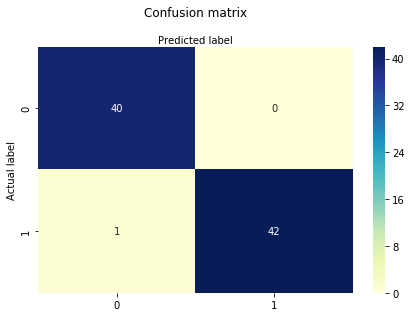

In [109]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [110]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9879518072289156
Precision: 1.0
Recall: 0.9767441860465116
